In [1]:
import pandas as pd
pd.set_option('max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Check missing values

In [3]:
def print_col_na(df):
    """Print names of columns with missing values

    Args:
        df (pandas Dataframe): Dataframe whose columns are examined
    """
    n_all = df.shape[0]
    for col in df.columns:
        sum_na = df[col].isna().sum()
        if sum_na > 0:
            print('Column \'{}\' has {} missing enties which makes {:.2f}%'\
                .format(col, sum_na, 100*sum_na/n_all))

In [4]:
print_col_na(df)

Column 'Engine Fuel Type' has 3 missing enties which makes 0.03%
Column 'Engine HP' has 69 missing enties which makes 0.58%
Column 'Engine Cylinders' has 30 missing enties which makes 0.25%
Column 'Number of Doors' has 6 missing enties which makes 0.05%
Column 'Market Category' has 3742 missing enties which makes 31.41%


As can be seen 'Market Category' column is missing almost 1/3 of the data, so it would be appropriate to drop the whole column. For the rest of the cases, there is less than 1% missing, so an imputation would be appropriate.

In [5]:
df = df.drop('Market Category', axis=1, errors='ignore')
df.shape

(11914, 15)

In [6]:
### Check 'Engine Fuel Type' missing entries
df[df['Engine Fuel Type'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,18499


The 'Engine Fuel Type' to be imputed will be chosen comparing engine characteristics of other vehicle entries and taking the most common one.

In [7]:
eng_fuel_type_imp = df[(df['Engine HP'] > 140.0) & (df['Engine HP'] < 170.0) & (df['Engine Cylinders'] == 6)]['Engine Fuel Type'].value_counts().sort_values().index[-1]
#print(eng_fuel_type_imp)

In [8]:
df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna(eng_fuel_type_imp)

In [9]:
### Check 'Number of Doors' missing entries
df[df['Number of Doors'].isna()]


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,Large,Coupe,16,11,2774,295000
6930,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,102,1391,79500
6931,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,101,98,1391,66000
6932,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,92,1391,134500
6933,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,NaN,Large,Sedan,100,97,1391,74500
6934,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,107,101,1391,71000


The missing number of doors will be imputed. For that the vehicle size and vehicle type will be used as a comparison parameter and then the most frequent case will be taken as a value.

In [10]:
# List with indexes of the rows with missing number of doors
list_index_miss_door = df[df['Number of Doors'].isna()].index
for i in list_index_miss_door:
    veh_size = df.iloc[i]['Vehicle Size']
    veh_style = df.iloc[i]['Vehicle Style']
    # Compare vehicles from the dataset with the same parameters
    num_doors = df[(df['Vehicle Size'] == veh_size) & \
        (df['Vehicle Style'] == veh_style)]['Number of Doors'].value_counts().\
            sort_values().index[-1]
    # Update the values
    df.at[i,'Number of Doors'] = num_doors

In [42]:
### Check 'Engine HP' missing entries
df[df['Engine HP'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,27,18,61,62915
2907,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,27,18,61,53915
2908,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,25,17,61,64915
4203,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr SUV,30,23,5657,29100
4204,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,28,22,5657,30850
4205,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,28,22,5657,26850


In [47]:
# Print proportions of na for electric and non-electric vehicles
print('Electrict proportion na:', df[df['Engine Fuel Type'] == 'electric']['Engine HP'].isna().mean().round(4))
print('Non-electrict proportion na:', df[df['Engine Fuel Type'] != 'electric']['Engine HP'].isna().mean().round(4))

Electrict proportion na: 0.6667
Non-electrict proportion na: 0.0021


It can be seen that almost 67% of the electrical vehicles are missing engine power information. So we will replace those 'NaN' with '0'. On the other hand there are 0.2% of the conventional internal combustion engine with missing engine power data. For those we can compare their 'engine cylinders' and 'vehicle size', as those two parameters are connected to the engine power.

In [49]:
### Impute values for missing 'Engine HP'
list_index_miss_eng_power = df[df['Engine HP'].isna()].index
for i in list_index_miss_eng_power:
    fuel_type = df.iloc[i]['Engine Fuel Type']
    veh_size = df.iloc[i]['Vehicle Size']
    cylinders = df.iloc[i]['Engine Cylinders']
    eng_hp = 0
    if fuel_type != 'electric':
    # Compare vehicles from the dataset with the same parameters
        eng_hp = df[(df['Vehicle Size'] == veh_size) & \
            (df['Engine Cylinders'] == cylinders)]['Engine HP'].value_counts().\
            sort_values().index[-1]
    # Update the values
    df.at[i,'Engine HP'] = eng_hp

In [12]:
df.isna().sum().sort_values()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      0
Transmission Type     0
Driven_Wheels         0
Number of Doors       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
Engine Cylinders     30
Engine HP            69
dtype: int64

In [15]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436210,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881267,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [16]:
def removing_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)

    IQR = Q3 - Q1

    min = Q1 - 1.5*IQR
    max = Q3 + 1.5*IQR

    df_no_outlier = dataframe[(dataframe[column] > min) & (dataframe[column] < max)]

    return df_no_outlier

In [17]:
#### Removing outlier from MSRP
#df = removing_outliers(df, 'MSRP')

In [18]:
#### Removing outlier for Popularity
#df = removing_outliers(df, 'Popularity')

In [19]:
#### Removing outliers for city mpg
#df = removing_outliers(df, 'city mpg')

In [20]:
#### Removing outliers for 'highway MPG'
#df = removing_outliers(df, 'highway MPG')

In [21]:
#### Removing outliers for Engine HP
#df = removing_outliers(df, 'Engine HP')

In [22]:
#### Removing outliers for Engine Cylinders
#df = removing_outliers(df, 'Engine Cylinders')

In [23]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436210,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881267,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [24]:
df.shape

(11914, 15)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11914 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11914 non-null float64
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


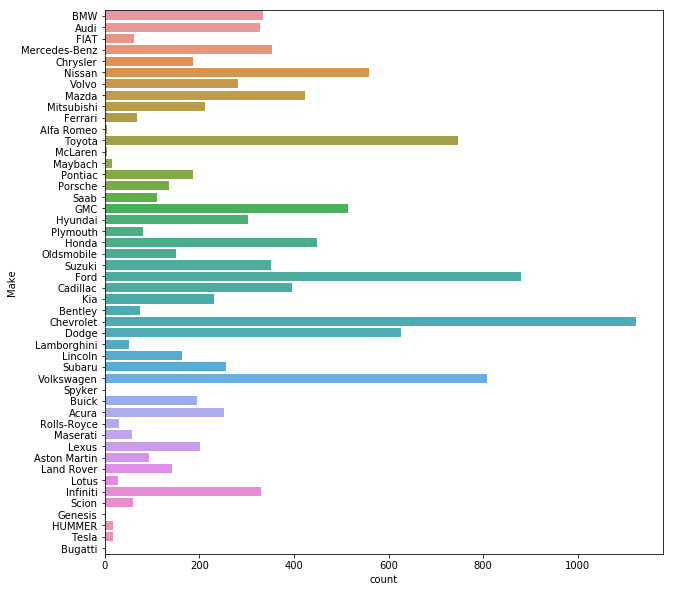

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, y='Make')

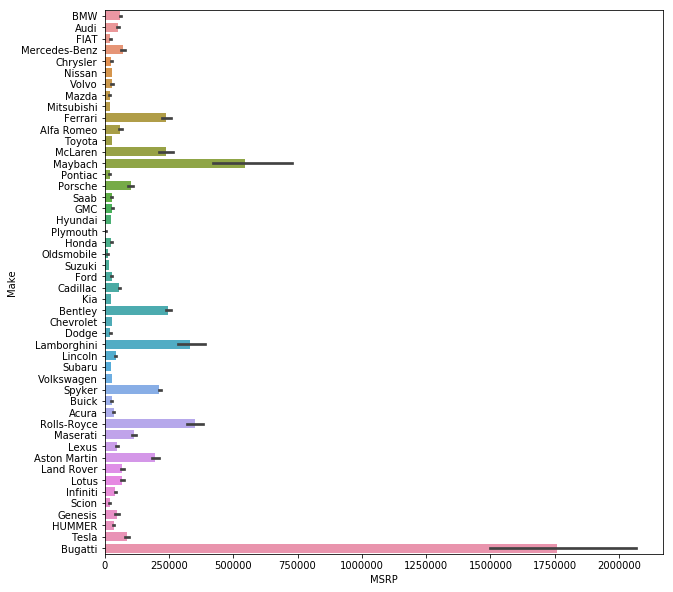

In [27]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, y='Make', x='MSRP')

In [28]:
df['Model'].value_counts()

Silverado 1500                 156
Tundra                         140
F-150                          126
Sierra 1500                     90
Beetle Convertible              89
Tacoma                          80
GTI                             76
Frontier                        76
Accord                          75
Beetle                          75
Civic                           68
Dakota                          65
Ram Pickup 1500                 62
Jetta                           61
Corvette                        60
911                             58
C/K 1500 Series                 56
XC60                            54
Colorado                        54
3                               53
370Z                            51
Sienna                          51
Golf GTI                        50
Sierra 1500 Classic             49
E-Class                         49
Silverado 1500 Classic          49
F-250                           48
Canyon                          48
Pilot               

In [29]:
df['Engine Fuel Type'].value_counts()

regular unleaded                                7175
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [30]:
df['Engine Fuel Type'].mode()[0]

'regular unleaded'

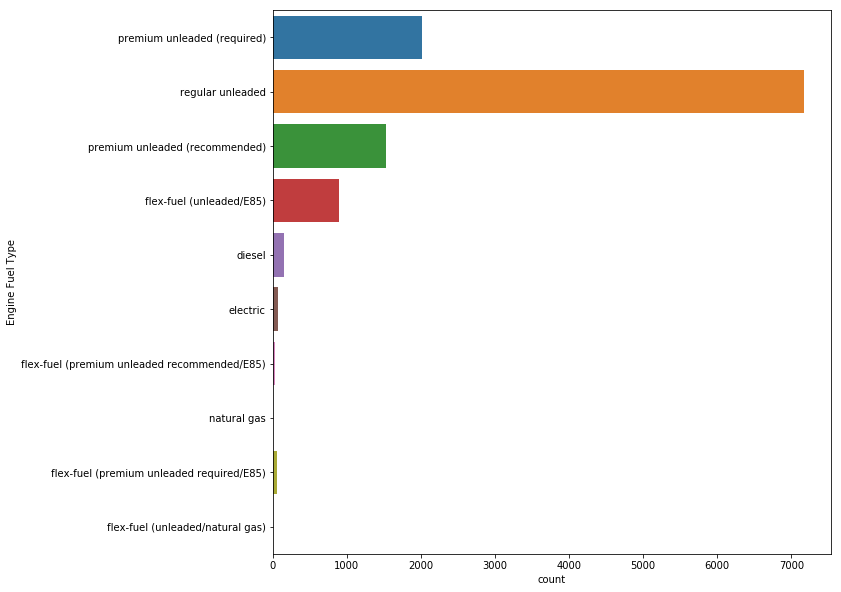

In [31]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df, y='Engine Fuel Type')

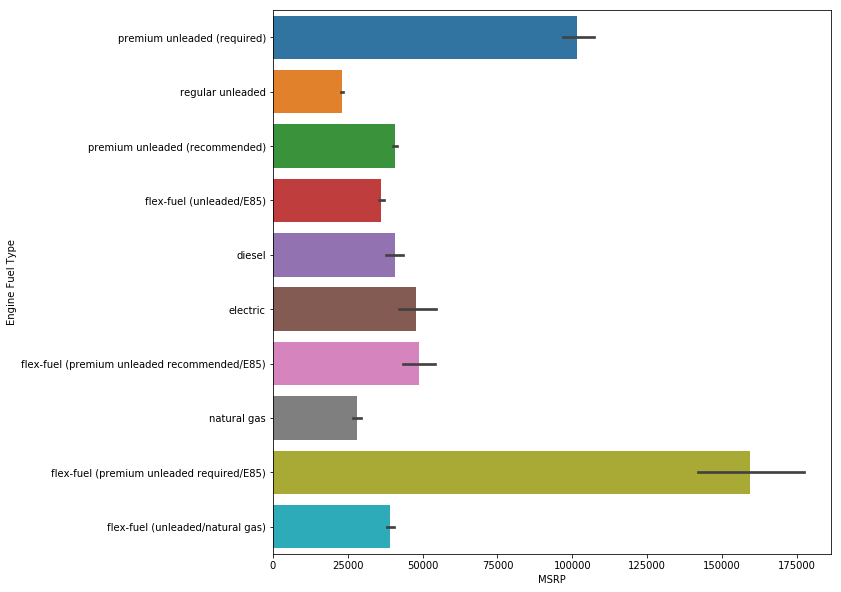

In [32]:
plt.figure(figsize=(10, 10))
sns.barplot(data=df, y='Engine Fuel Type', x='MSRP')

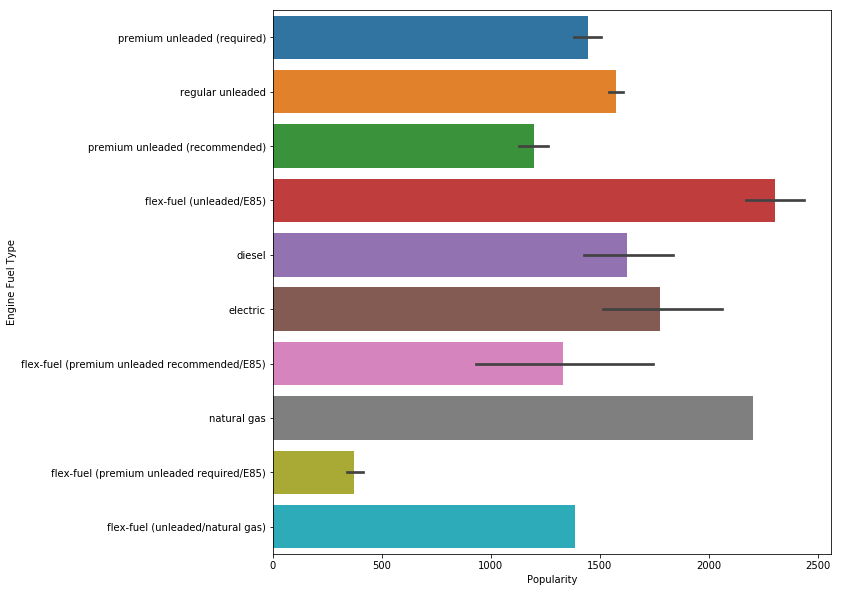

In [33]:
plt.figure(figsize=(10, 10))
sns.barplot(data=df, y='Engine Fuel Type', x='Popularity')

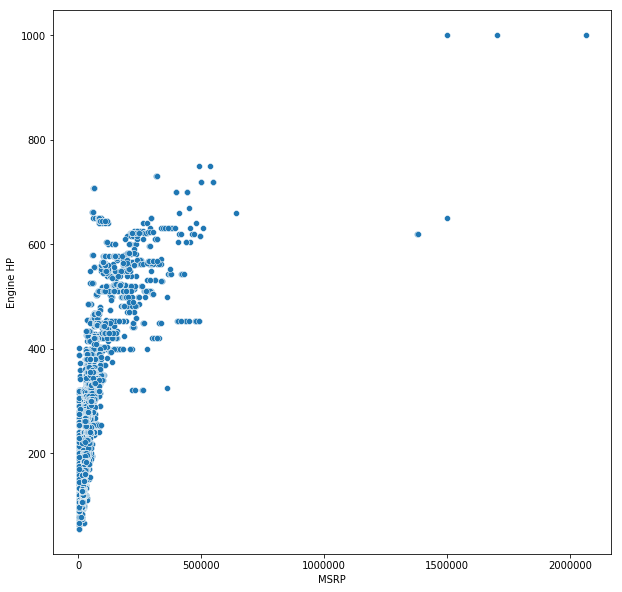

In [34]:
#### Scatter plot Engine HP
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, y='Engine HP', x='MSRP')

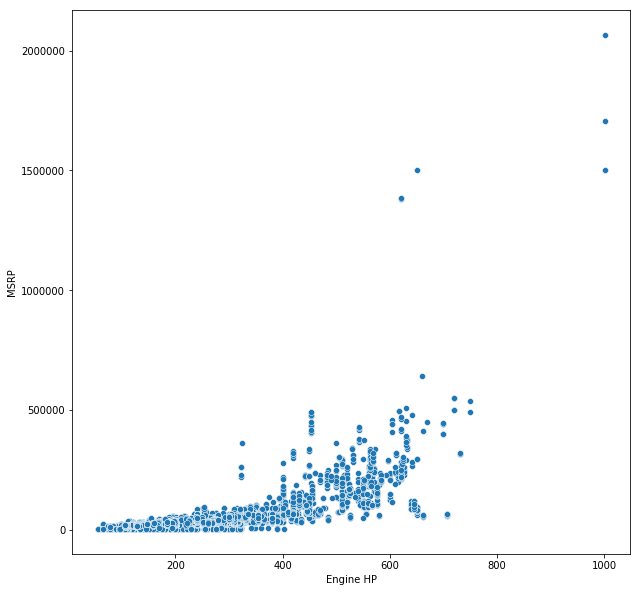

In [35]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='Engine HP', y='MSRP')

In [36]:
df[df['MSRP'] < 8000].head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
17,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000
19,Audi,100,1992,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,20,16,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000
21,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Midsize,Sedan,21,16,3105,2000


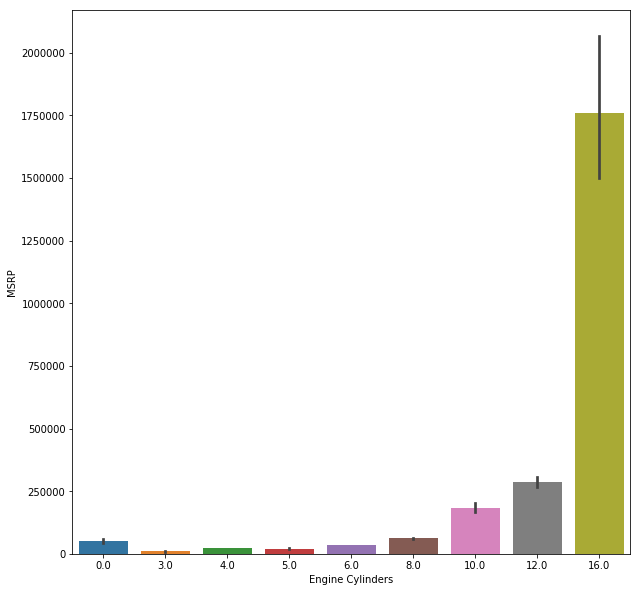

In [37]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, y='MSRP', x='Engine Cylinders')

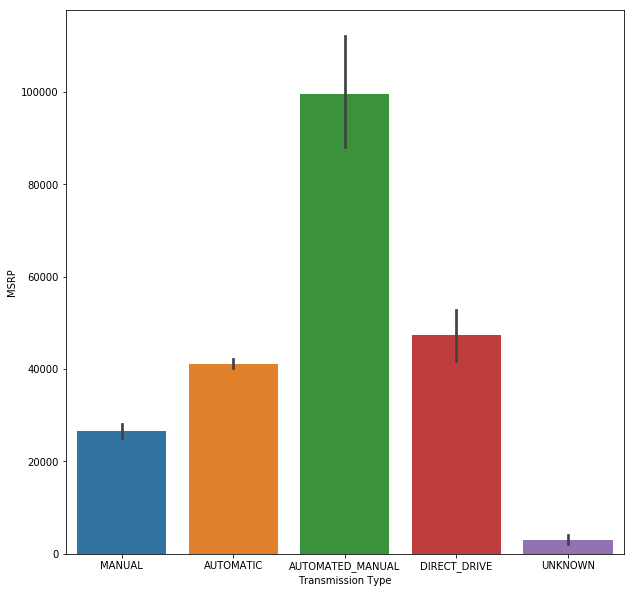

In [38]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, y='MSRP', x='Transmission Type')

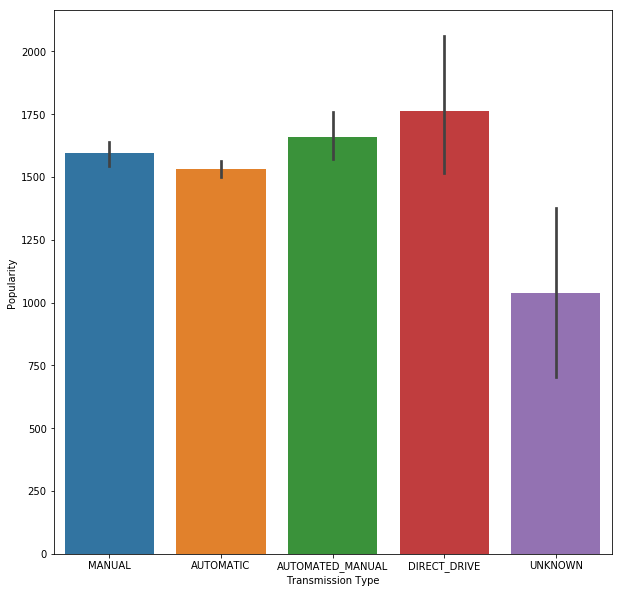

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, y='Popularity', x='Transmission Type')

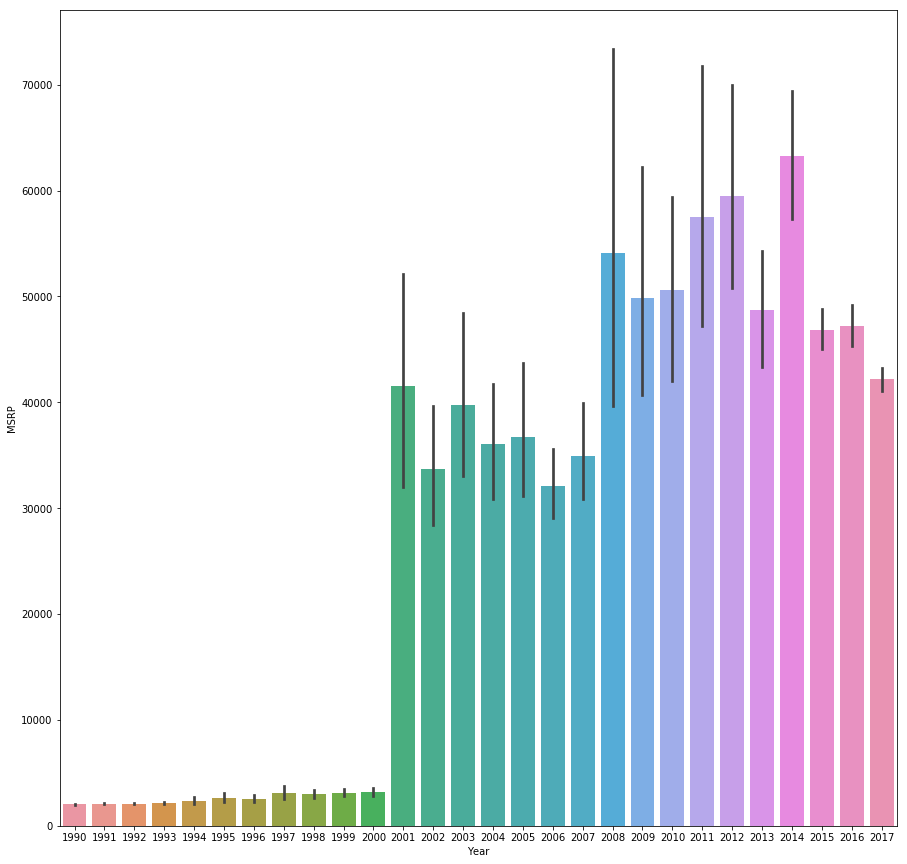

In [40]:
plt.figure(figsize=(15,15))
sns.barplot(x='Year', data=df, y='MSRP')

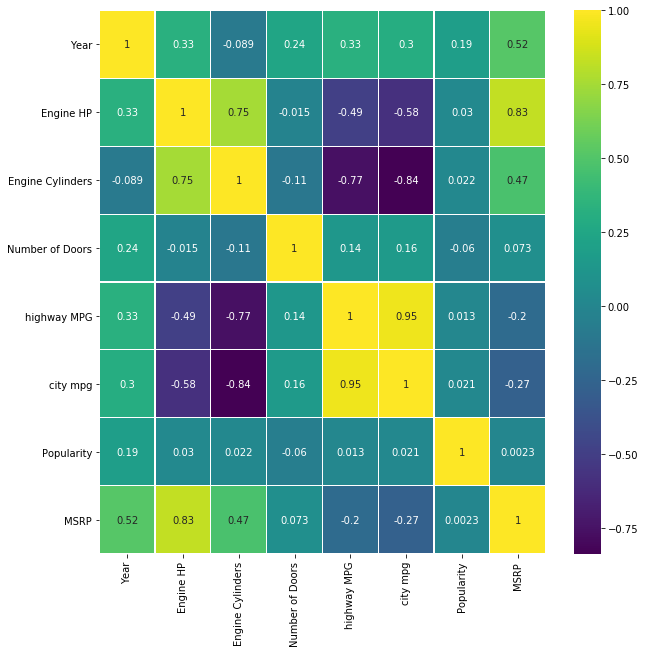

In [41]:
#### Let see the correlation of all the features
corr = df.corr(method='spearman')
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='viridis', annot=True, linewidths=0.1)